### Mopsy and Mocha ####

#### Introduction ###
Here in this machine learning project, we will be using the concept of convolutional linear regression, where we will be interaction a set of images, some with a dog and others with a cat. The data set has already been divided into a testing and training set, where we will begin to train a model to identify cats, dogs, and the differences between them.


Below is some code that allows for the importing of all images as a Numpy array, for which the skimage library was used. First, all related libraries were imported.

In [5]:
import sys, os
import skimage.io, skimage.color

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This function returns the shape of an image, given a folder path and a filename. This is returned as a Numpy array.

In [2]:
def get_image_resolution(folder, file):
    full_path = os.path.join(folder, file)
    img_data = skimage.io.imread(full_path)
    bw_data = skimage.color.rgb2gray(img_data)
    return bw_data.shape

As a proof of concept to show that pictures could be read, all training dog pictures were opened into a Numpy array, where the `get_image_resolution()` function extracted the shape as long as the image is opened. Only one folder is needed for this proof of concept.

In [3]:
# First, we need to get every single file.
training_dog_folder = "training_set/dogs"

training_dog_paths = os.listdir(training_dog_folder)
training_dog_resolutions = [get_image_resolution(training_dog_folder, i) for i in training_dog_paths]
x = skimage.io.imread('All_Might_Hero_Form_Full_Body.png')
print(training_dog_resolutions)

[(499, 327), (292, 269), (397, 500), (375, 499), (500, 347), (199, 200), (166, 220), (333, 235), (355, 500), (500, 499), (241, 323), (332, 500), (479, 500), (500, 440), (269, 360), (199, 300), (106, 160), (299, 217), (429, 499), (500, 320), (335, 275), (298, 194), (374, 500), (318, 349), (373, 499), (401, 426), (499, 390), (189, 199), (150, 199), (368, 432), (500, 424), (261, 350), (500, 332), (99, 100), (217, 249), (433, 499), (375, 499), (375, 499), (332, 499), (375, 304), (490, 363), (497, 500), (479, 412), (335, 448), (375, 499), (499, 479), (375, 499), (375, 499), (465, 500), (375, 499), (116, 200), (374, 500), (500, 379), (375, 499), (499, 236), (374, 500), (400, 270), (221, 170), (402, 394), (328, 500), (488, 500), (155, 200), (288, 299), (375, 499), (500, 321), (499, 375), (375, 499), (179, 135), (374, 500), (500, 405), (374, 500), (447, 336), (290, 349), (344, 499), (334, 445), (500, 374), (496, 400), (345, 250), (500, 341), (458, 499), (465, 399), (375, 499), (417, 350), (375

With these resolutions, next week, the resolutions will be filtered using a histogram, so comparisons can only be made between similarly sized pictures. Since reading these resolutions requires getting the shape of each Numpy array of pixels, it indicates that every image file in a folder of pictures was opened.

Our progress is available at https://github.com/andy64734/all-might.

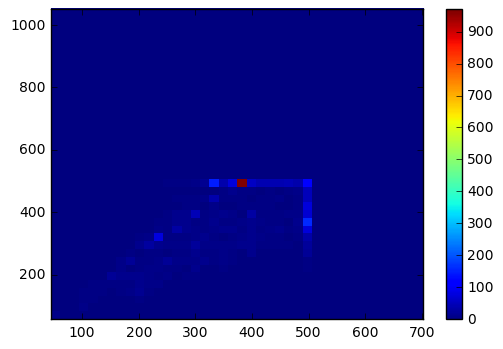

In [7]:
HORIZ_INDEX = 0
VERT_INDEX = 1

horiz_reses = [i[HORIZ_INDEX] for i in training_dog_resolutions]
vert_reses = [i[VERT_INDEX] for i in training_dog_resolutions]
plt.hist2d(horiz_reses,vert_reses,bins=40)
plt.colorbar()
plt.show()

C:\Users\sharana\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


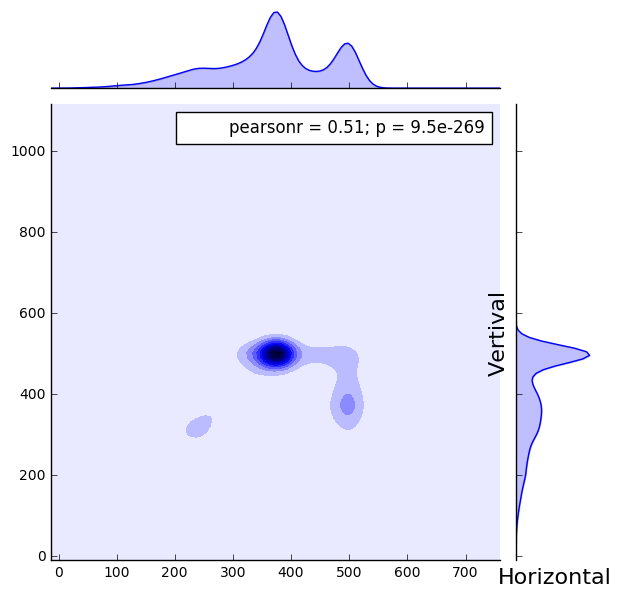

In [17]:
%matplotlib inline
sns.jointplot(np.array(horiz_reses), np.array(vert_reses), kind="kde")
plt.xlabel("Horizontal", fontsize=16)
plt.ylabel("Vertival", fontsize=16)